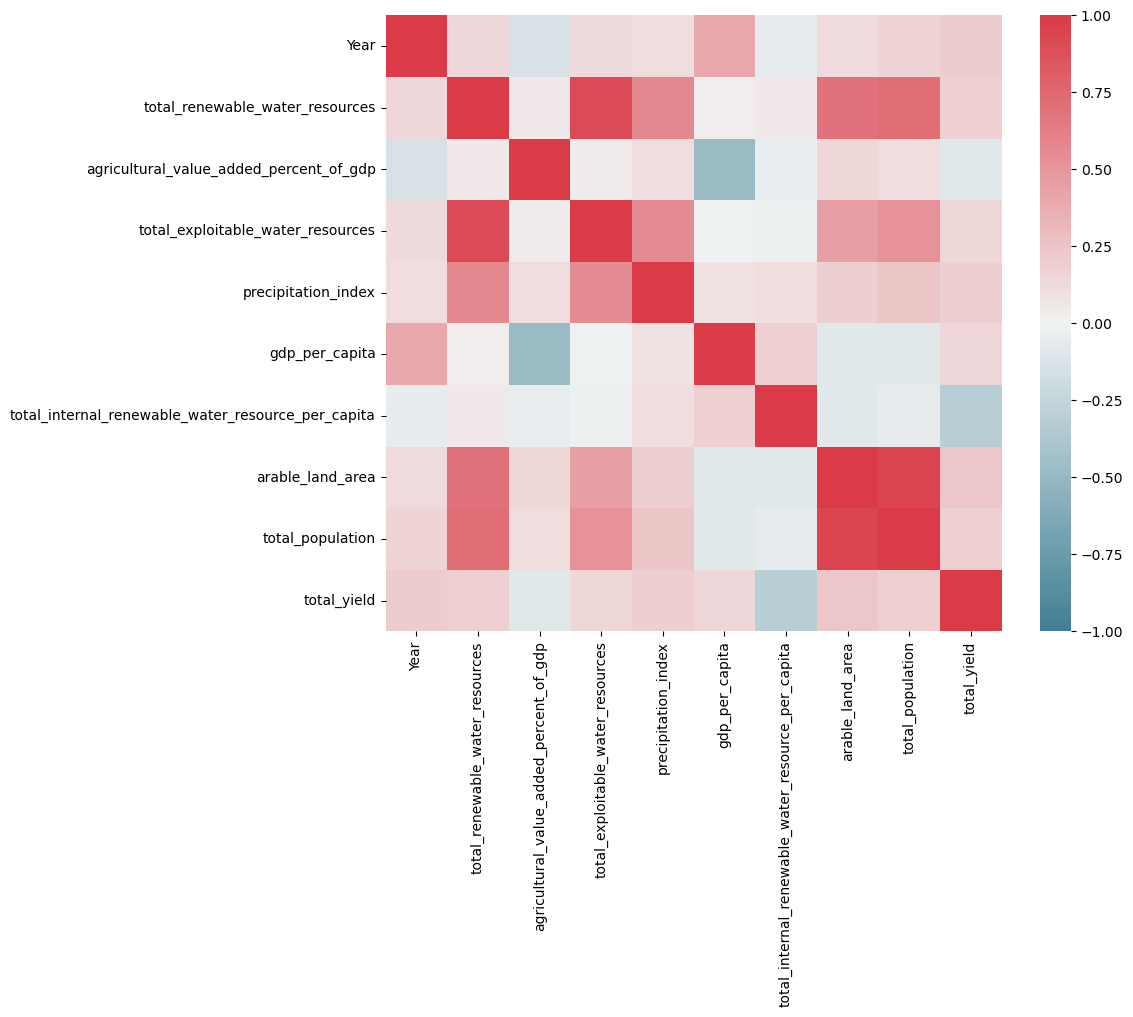

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import numpy as np
import nltk
import math
from collections import Counter 
from math import log2
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%run data_intake.ipynb
import os
import seaborn as sns

In [14]:
"""
First, let's look at our class data, which we can see is represented as the various crops attainable yields and'
yields gaps. The attainble minus the gap gives us the crop yield. This data is representing various crop yields
by year by country in tons per hectare.
"""
fn = "Attainable_yields.csv"
pd.read_csv(f"data/{fn}")

Entity  Year  barley_attainable  cassava_attainable  \
0     Afghanistan  1961               3.29                0.00   
1     Afghanistan  1962               3.29                0.00   
2     Afghanistan  1963               3.29                0.00   
3     Afghanistan  1964               3.29                0.00   
4     Afghanistan  1965               3.29                0.00   
...           ...   ...                ...                 ...   
8089     Zimbabwe  2014               2.79               14.12   
8090     Zimbabwe  2015               2.79               14.12   
8091     Zimbabwe  2016               2.79               14.12   
8092     Zimbabwe  2017               2.79               14.12   
8093     Zimbabwe  2018               2.79               14.12   

      cotton_attainable  groundnut_attainable  maize_attainable  \
0                  3.36                  4.71             10.40   
1                  3.36                  4.71             10.40   
2                  3.36                  4.71             10.40   
3                  3.36                  4.71             10.40   
4                  3.36                  4.71             10.40   
...                 ...                   ...               ...   
8089               3.83                  3.13              5.06   
8090               3.83                  3.13              5.06   
8091               3.83                  3.13              5.06   
8092               3.83                  3.13              5.06   
8093               3.83                  3.13              5.06   

      millet_attainable  oilpalm_attainable  potato_attainable  ...  \
0                  1.98                 0.0              45.81  ...   
1                  1.98                 0.0              45.81  ...   
2                  1.98                 0.0              45.81  ...   
3                  1.98                 0.0              45.81  ...   
4                  1.98                 0.0              45.81  ...   
...                 ...                 ...                ...  ...   
8089               1.99                 0.0              28.40  ...   
8090               1.99                 0.0              28.40  ...   
8091               1.99                 0.0              28.40  ...   
8092               1.99                 0.0              28.40  ...   
8093               1.99                 0.0              28.40  ...   

      soybeans_yield_gap  rapeseed_yield_gap  sugarbeet_yield_gap  \
0                    NaN                 NaN                66.02   
1                    NaN                 NaN                61.22   
2                    NaN                 NaN                62.39   
3                    NaN                 NaN                69.15   
4                    NaN                 NaN                64.01   
...                  ...                 ...                  ...   
8089                1.24                 NaN                  NaN   
8090                1.47                 NaN                  NaN   
8091                1.22                 NaN                  NaN   
8092                0.91                 NaN                  NaN   
8093                0.92                 NaN                  NaN   

      sugarcane_yield_gap  potato_yield_gap  oilpalm_yield_gap  \
0                    0.00             37.14                NaN   
1                    0.00             38.14                NaN   
2                    0.00             37.68                NaN   
3                    0.00             37.21                NaN   
4                    0.00             37.01                NaN   
...                   ...               ...                ...   
8089                20.43             11.63                NaN   
8090                32.16             11.46                NaN   
8091                29.78             11.40                NaN   
8092                29.81             11.35                NaN   
8093 

In [26]:
"""
To simplify our classes, we can combine all thse seperate yields into one aggregate yield by country and by year
"""
crop_yeild = pipeline([], "Attainable_yields.csv", "value")
crop_yeild

Country  Year  total_yield
0     Afghanistan  1961        28.62
1     Afghanistan  1962        32.67
2     Afghanistan  1963        31.90
3     Afghanistan  1964        25.69
4     Afghanistan  1965        31.41
...           ...   ...          ...
8089     Zimbabwe  2014       122.40
8090     Zimbabwe  2015       109.41
8091     Zimbabwe  2016       111.70
8092     Zimbabwe  2017       113.47
8093     Zimbabwe  2018       114.44

[8094 rows x 3 columns]

In [50]:
def plot_crop_yield_by_country(data, include_legend=True):
    plt.figure(figsize = (20,10))
    for country in data['Country'].unique():
        country_data = data[data['Country'] == country]
        plt.plot(country_data['Year'], country_data['total_yield'], label=country)
    if include_legend:
        leg = plt.legend(loc='upper right', fontsize="8")
    plt.xlabel('Year')
    plt.ylabel('Crop Yield (Tons per Hectare)')
    plt.show()

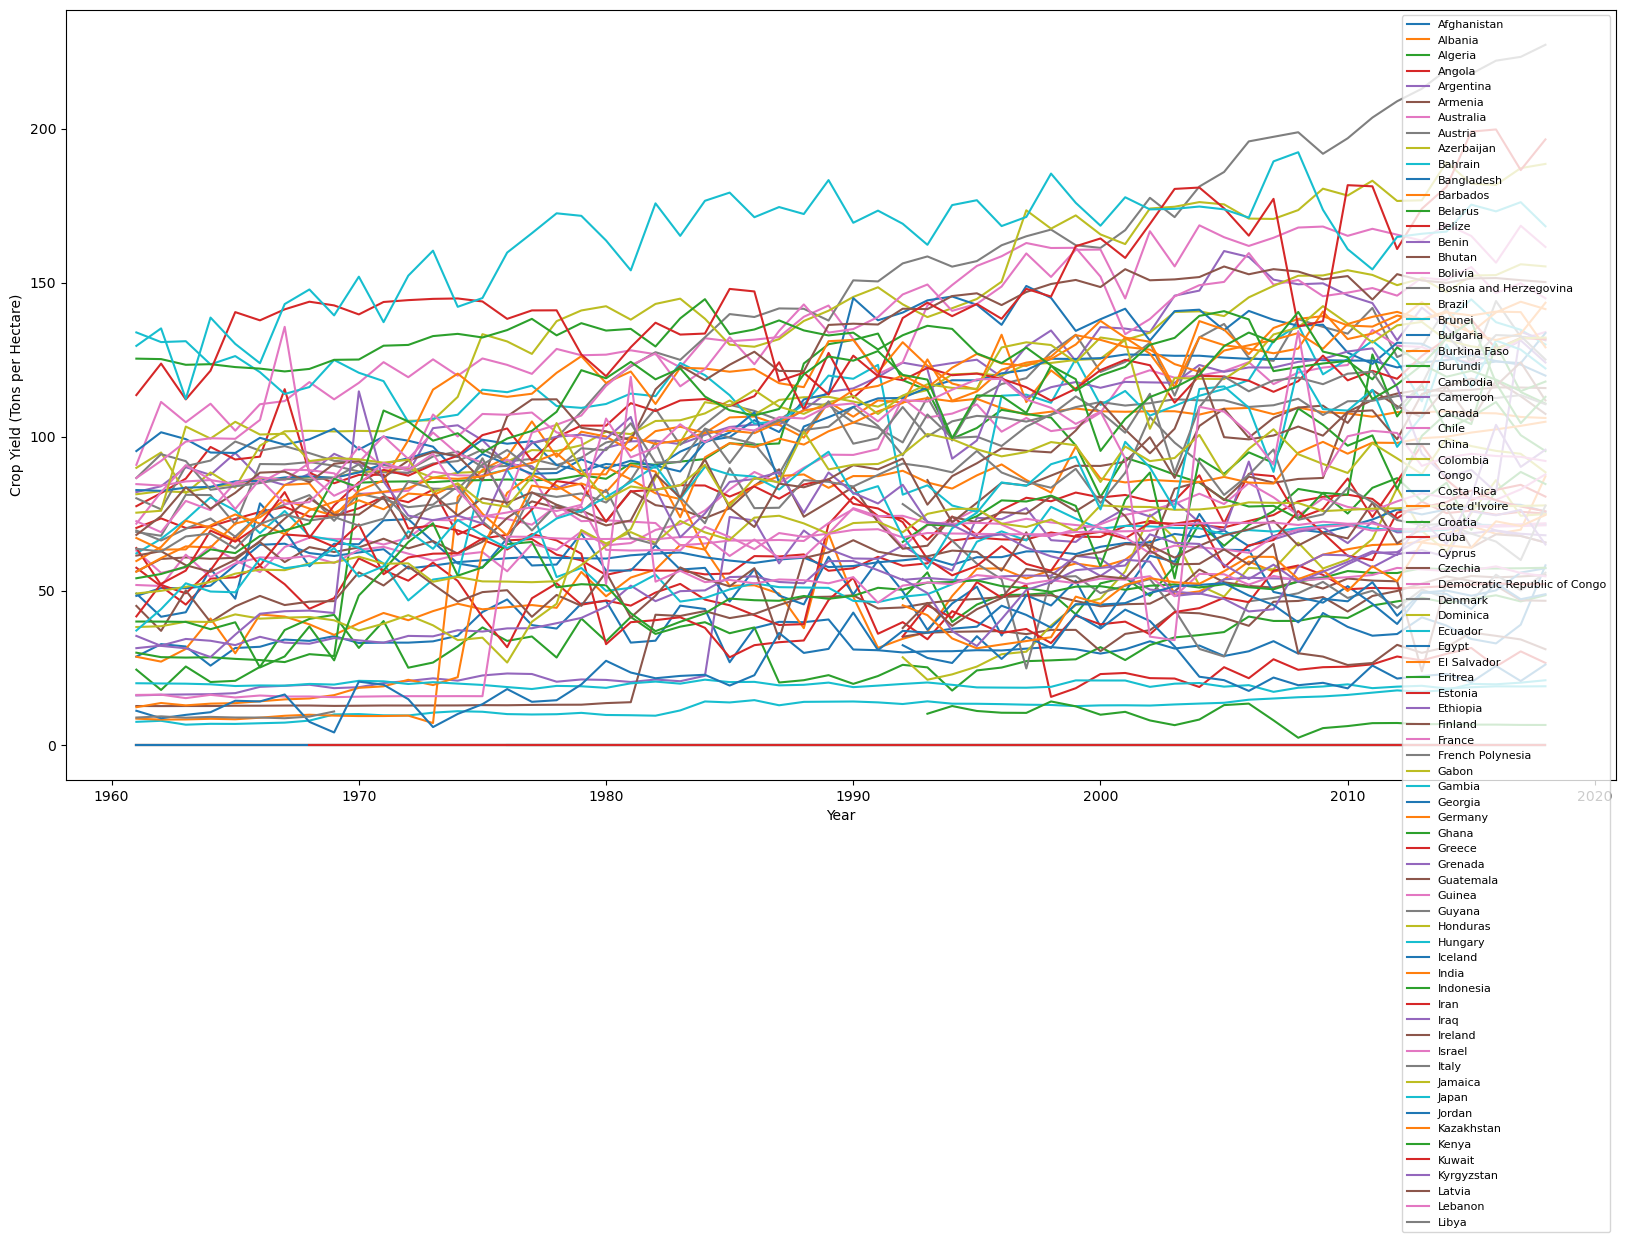

In [52]:
plot_crop_yield_by_country(crop_yeild[0:4047])

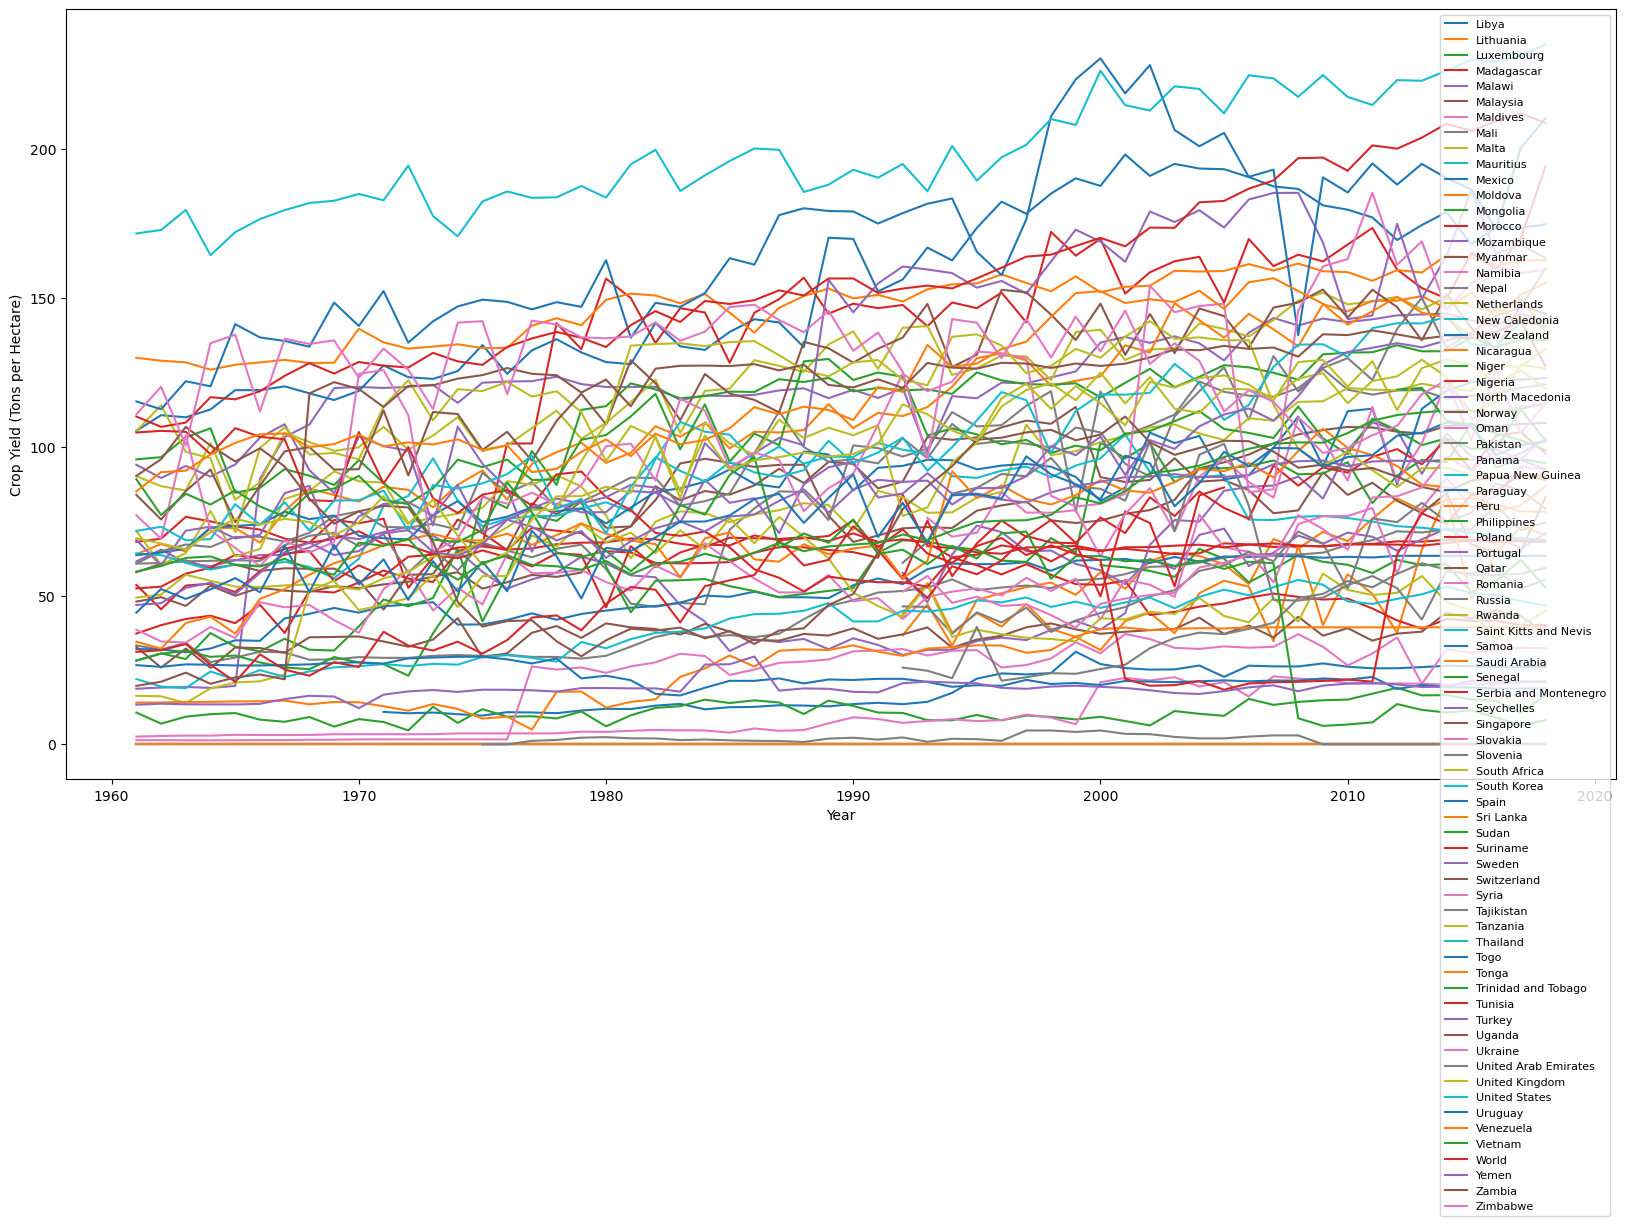

In [53]:
plot_crop_yield_by_country(crop_yeild[4048:8094])

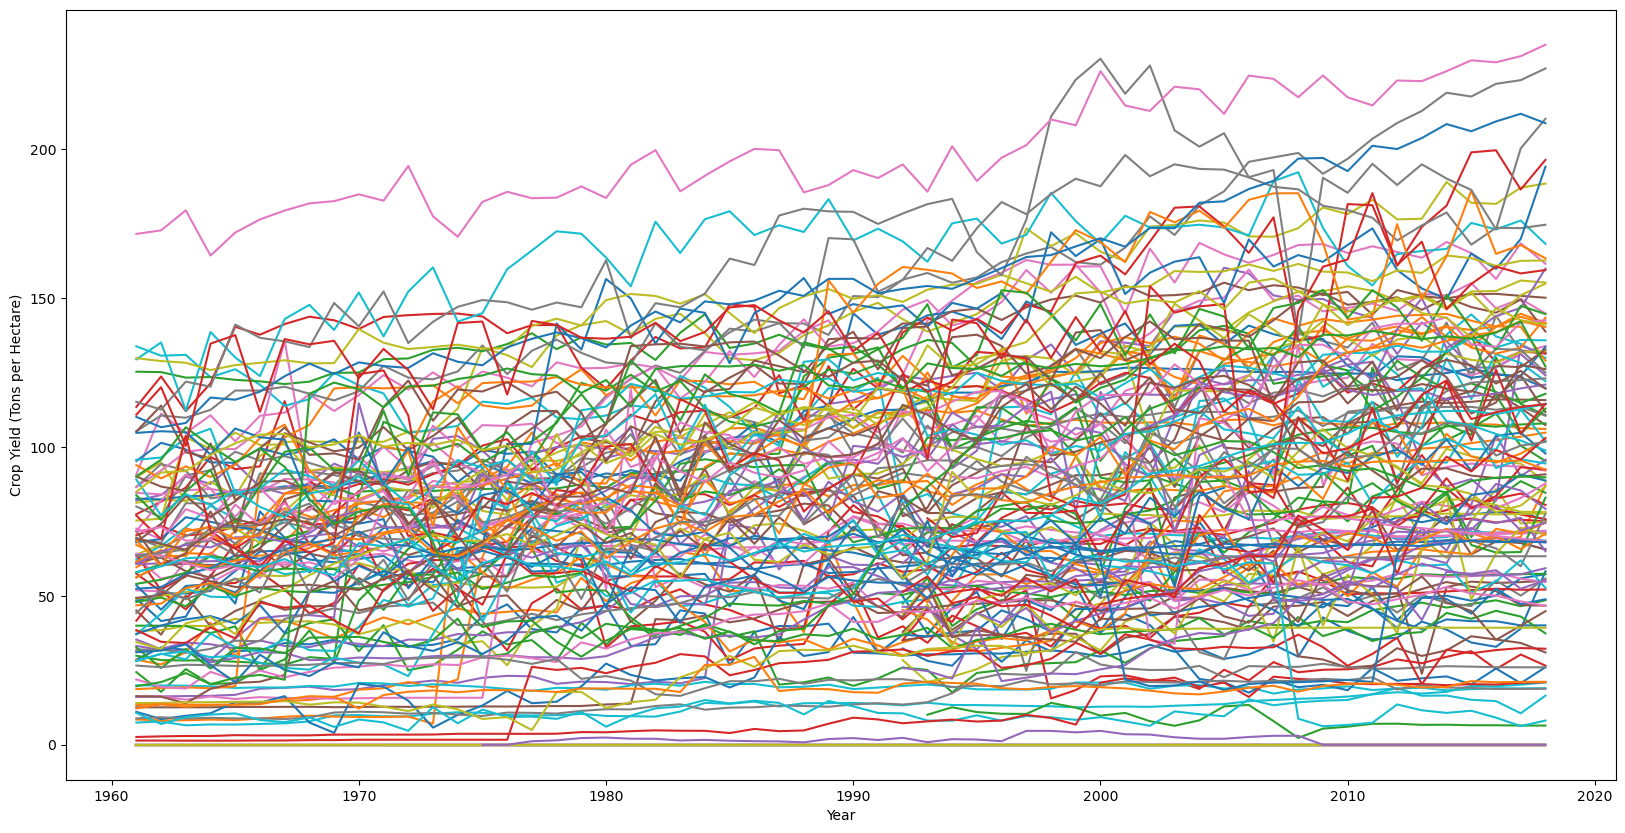

In [54]:
plot_crop_yield_by_country(crop_yeild, False)

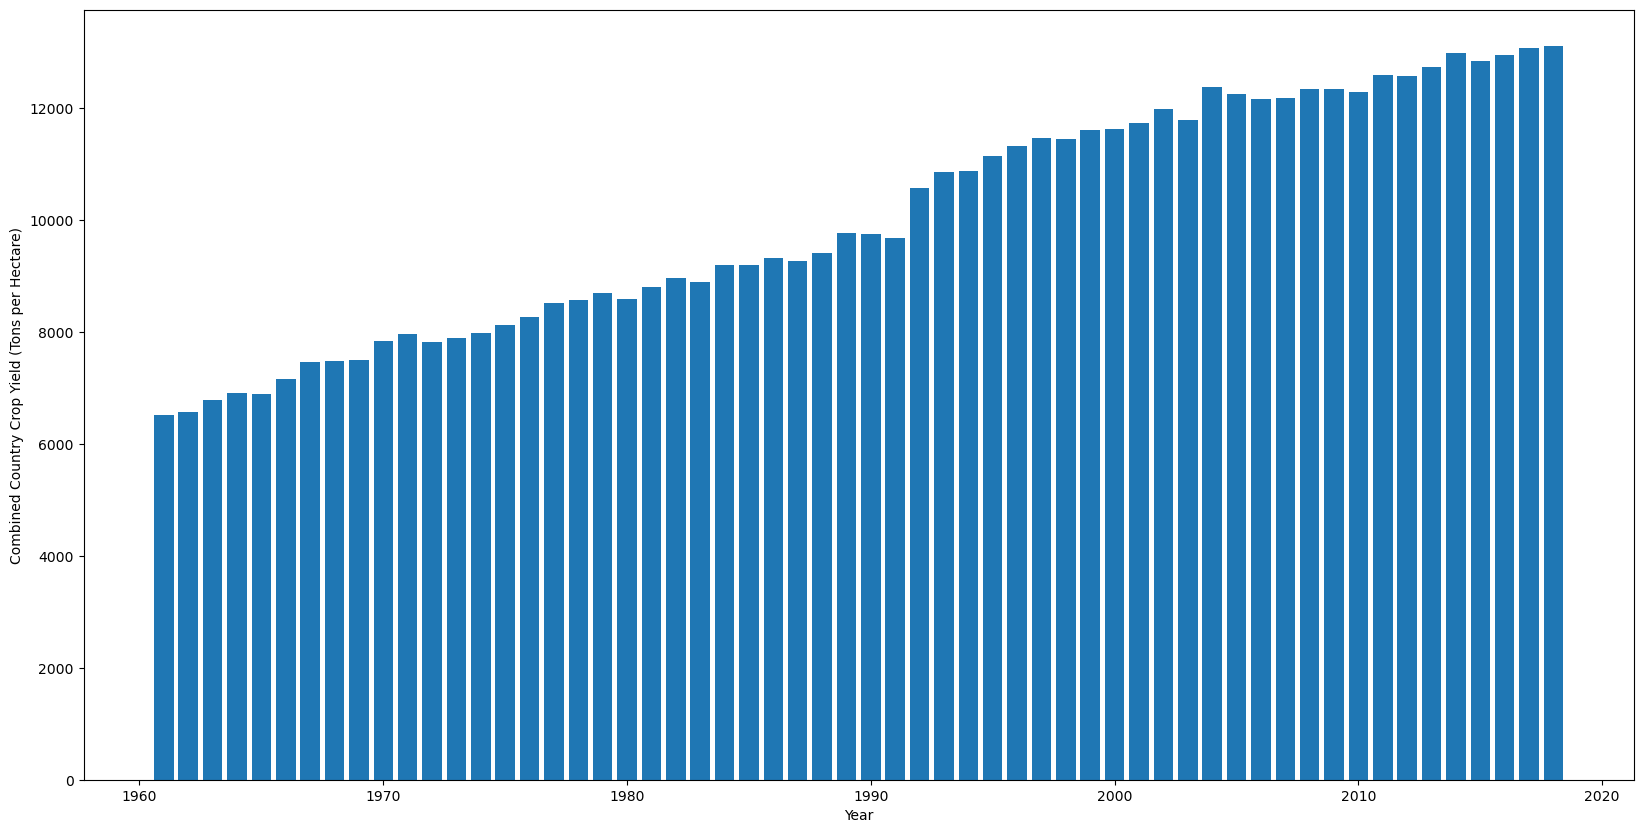

In [62]:
def plot_total_crop_volume_by_year(data):
    plt.figure(figsize = (20,10))
    
    years = []
    sums = []
    
    for year in data['Year'].unique():
        year_data = data[data['Year'] == year]
        total_crop_yield = year_data['total_yield'].sum()
        years.append(year)
        sums.append(total_crop_yield)
        
    plt.xlabel('Year')
    plt.ylabel('Combined Country Crop Yield (Tons per Hectare)')
    plt.bar(years,sums)

plot_total_crop_volume_by_year(crop_yeild)

In [65]:
"""
Moving onto the feature data, here we have a ton of various categorical values associated with water resources
and various socioeconomic factors per country per year, including our total crop yields
"""
aquastat_file_names = [fn for fn in os.listdir("data/") if ".xlsx" in fn]
aquastat_crop_yeild = pipeline(aquastat_file_names, "Attainable_yields.csv", "value")
aquastat_crop_yeild

Country  Year  total_renewable_water_resources  \
59      Albania  2018                             30.2   
60      Albania  2017                             30.2   
61      Albania  2016                             30.2   
62      Albania  2015                             30.2   
63      Albania  2014                             30.2   
...         ...   ...                              ...   
10412  Zimbabwe  1994                             20.0   
10413  Zimbabwe  1993                             20.0   
10414  Zimbabwe  1992                             20.0   
10415  Zimbabwe  1991                             20.0   
10416  Zimbabwe  1990                             20.0   

       agricultural_value_added_percent_of_gdp  \
59                                   18.429476   
60                                   19.022127   
61                                   19.849993   
62                                   19.780225   
63                                   19.990153   
...                                        ...   
10412                                13.948258   
10413                                11.218912   
10414                                 5.513596   
10415                                11.062933   
10416                                12.112429   

       total_exploitable_water_resources  precipitation_index  gdp_per_capita  \
59                                  13.0          1136.000000     5257.650696   
60                                  13.0          1136.000000     4514.204908   
61                                  13.0          1136.000000     4109.340457   
62                                  13.0          1136.000000     3939.413126   
63                                  13.0          1136.000000     4567.281443   
...                                  ...                  ...             ...   
10412                                1.5           732.125000      946.224014   
10413                                1.5           733.500000      913.671452   
10414                                1.5           666.566667      957.173183   
10415                                1.5           599.633333     1184.578132   
10416                                1.5           532.700000     1299.806761   

       dam_capacity  total_population_with_access_to_safe_drinking_water  \
59         4.030000                                               95.1     
60         4.030000                                               95.1     
61         4.030000                                               95.1     
62         4.030000                                               95.1     
63         4.030000                                               95.1     
...             ...                                                ...     
10412     99.889946                                               79.5     
10413     99.489946                                               79.6     
10414     99.489946                                               79.6     
10415     99.489946                                               79.5     
10416     99.489946                                               79.4     

       total_internal_renewable_water_resource_per_capita  arable_land_area  \
59                                           9331.399988            611.346   
60                                           9326.776621            612.000   
61                                           9319.444935            620.300   
62                                           9306.306528            615.100   
63                                           9287.695875            615.600   
...                                                  ...                ...   
10412                                        1088.641333           3100.000   
10413                                        1105.224792           3030.000   
10414                                        1124.718843           2990.000   
10415                             

In [71]:
"""
To determine feature importance and get a sense of how each feature correlates with one another and crop yield,
we can create some correlation matrixes
"""

In [74]:
def correlation_matrix(data):
    f, ax = plt.subplots(figsize=(10, 8))
    corr = data.corr()
    sns.heatmap(corr,
        cmap=sns.diverging_palette(220, 10, as_cmap=True),
        vmin=-1.0, vmax=1.0,
        square=True, ax=ax)


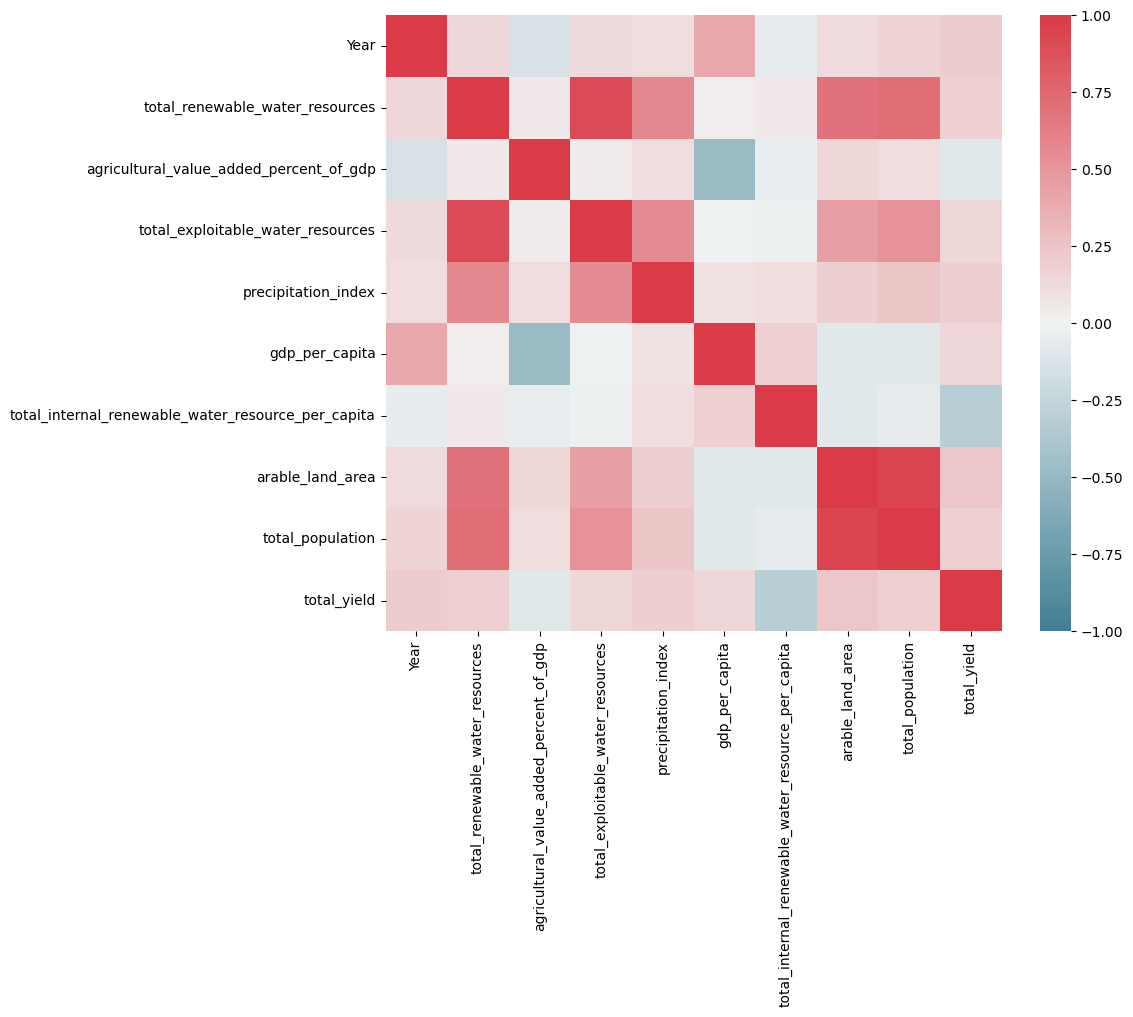

In [75]:
correlation_matrix(aquastat_crop_yeild)

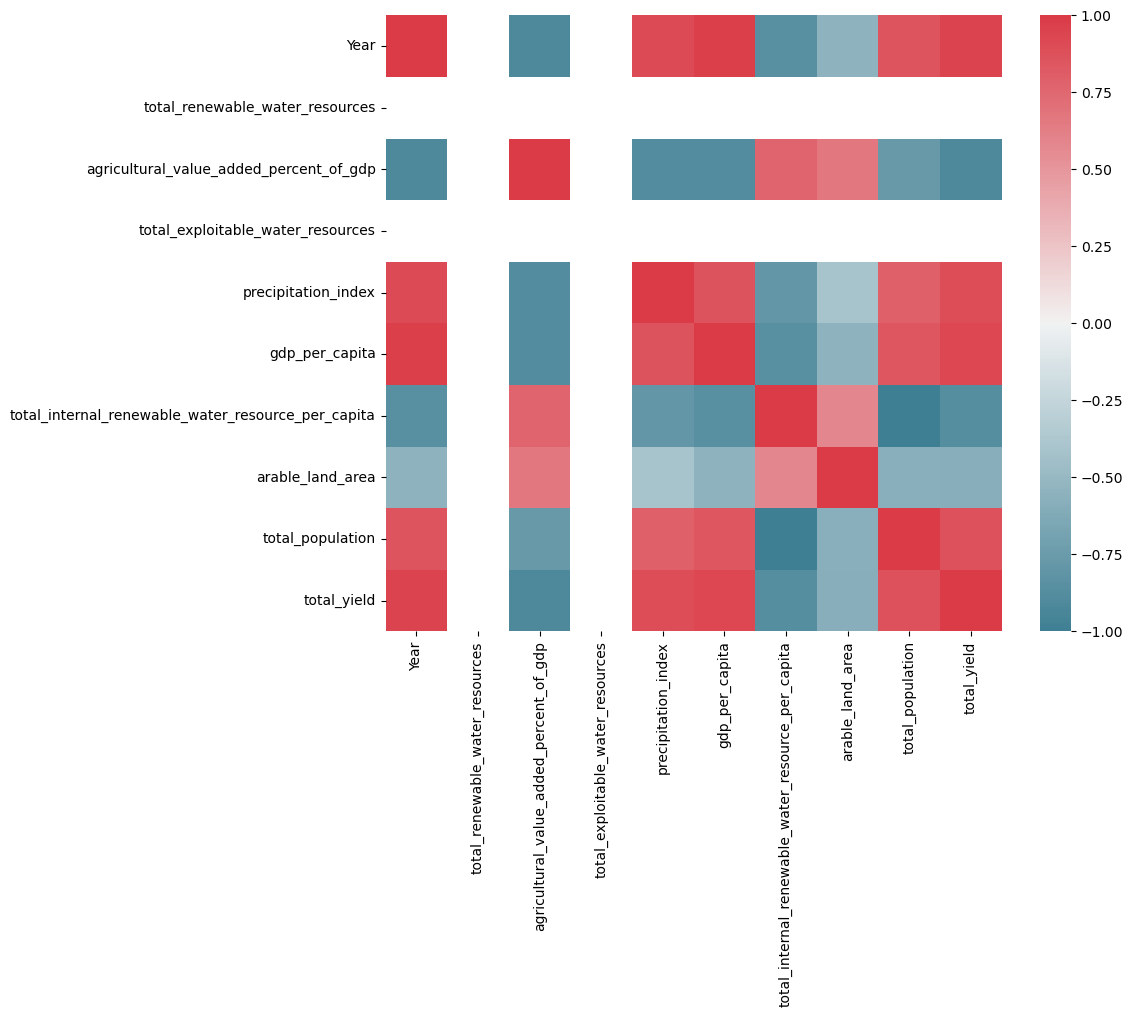

In [87]:
"""
Because county disparities are so large between these metrics, it can be more helpful to look at this data in terms
of correlation on a country by country basis
"""
data = aquastat_crop_yeild[aquastat_crop_yeild['Country'] == 'Germany']
correlation_matrix(data)

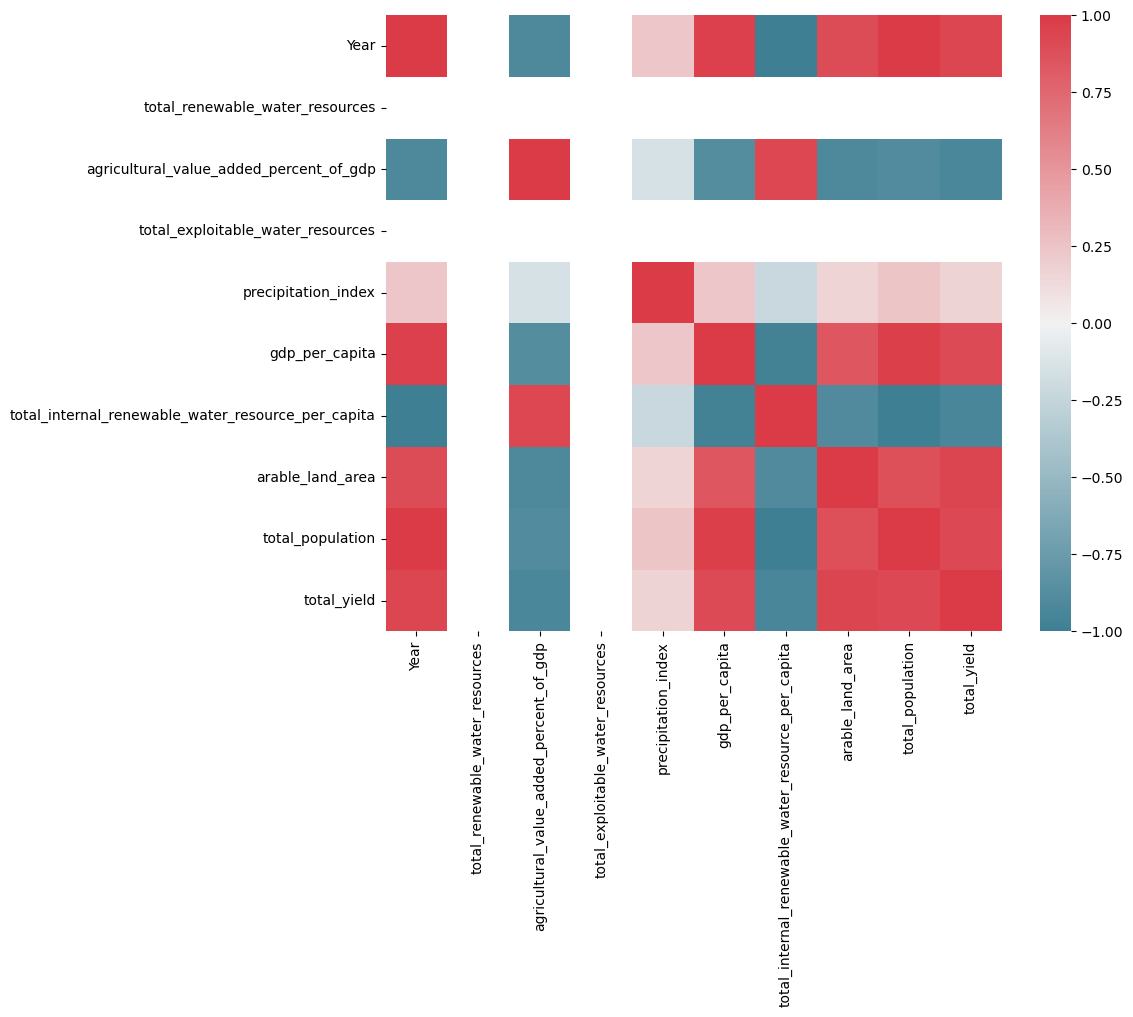

In [88]:
data = aquastat_crop_yeild[aquastat_crop_yeild['Country'] == 'France']
correlation_matrix(data)